In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_csv('../data/kdd_train.csv')

In [48]:
# Set style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (16, 6)

Total unique attack types: 23

Attack type counts:
attack_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64


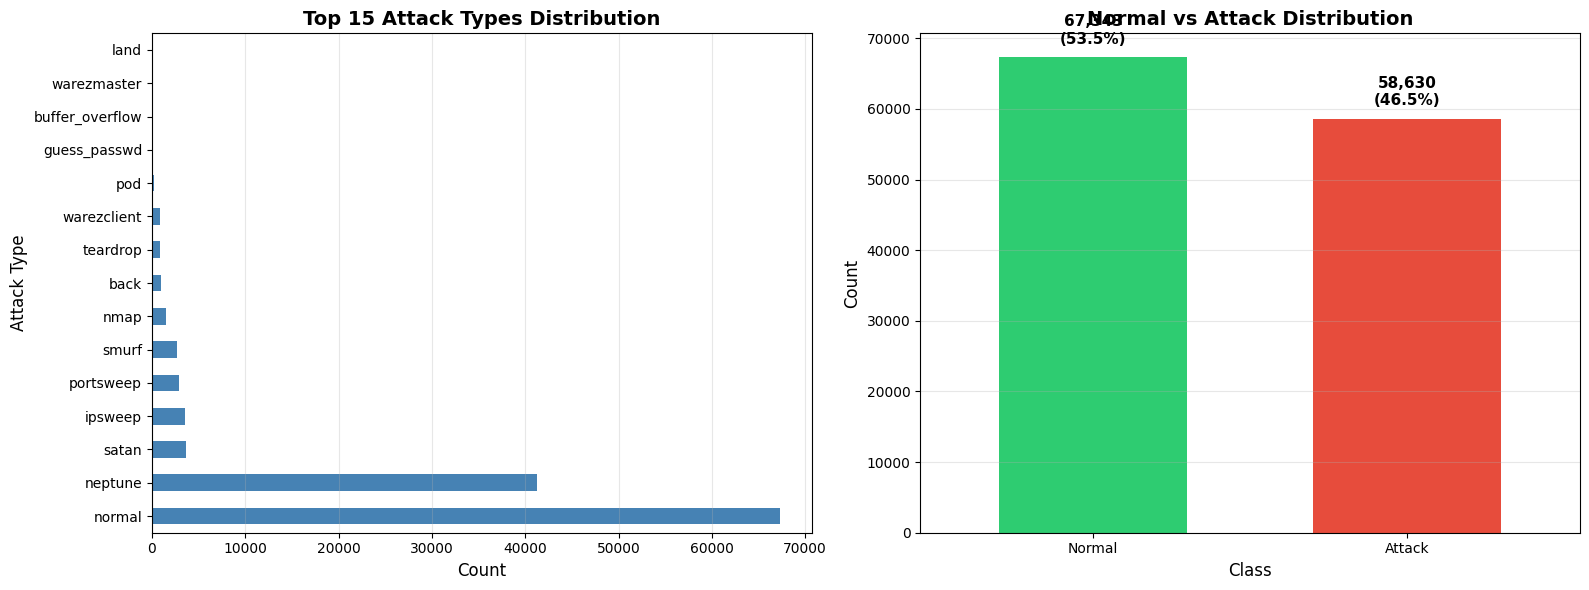


Class balance:
  Normal:  67,343 (53.5%)
  Attack:  58,630 (46.5%)


In [49]:
# Attack type distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Top 15 attack types
attack_counts = df['attack_type'].value_counts()
print(f"Total unique attack types: {len(attack_counts)}")
print(f"\nAttack type counts:\n{attack_counts}")

ax1 = axes[0]
attack_counts.head(15).plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Top 15 Attack Types Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Attack Type', fontsize=12)
ax1.grid(axis='x', alpha=0.3)

# Right plot: Binary classification (Normal vs Attack)
ax2 = axes[1]
binary_dist = df['attack_type'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack').value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = binary_dist.plot(kind='bar', ax=ax2, color=colors, width=0.6)
ax2.set_title('Normal vs Attack Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Class', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.grid(axis='y', alpha=0.3)

# Add count and percentage labels on bars
for i, v in enumerate(binary_dist):
    percentage = v/len(df)*100
    ax2.text(i, v + 1500, f'{v:,}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\nClass balance:")
print(f"  Normal:  {binary_dist['Normal']:6,} ({binary_dist['Normal']/len(df)*100:.1f}%)")
print(f"  Attack:  {binary_dist['Attack']:6,} ({binary_dist['Attack']/len(df)*100:.1f}%)")

In [50]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'difficulty_level'],
      dtype='object')

Analyzing correlations for 37 numeric features


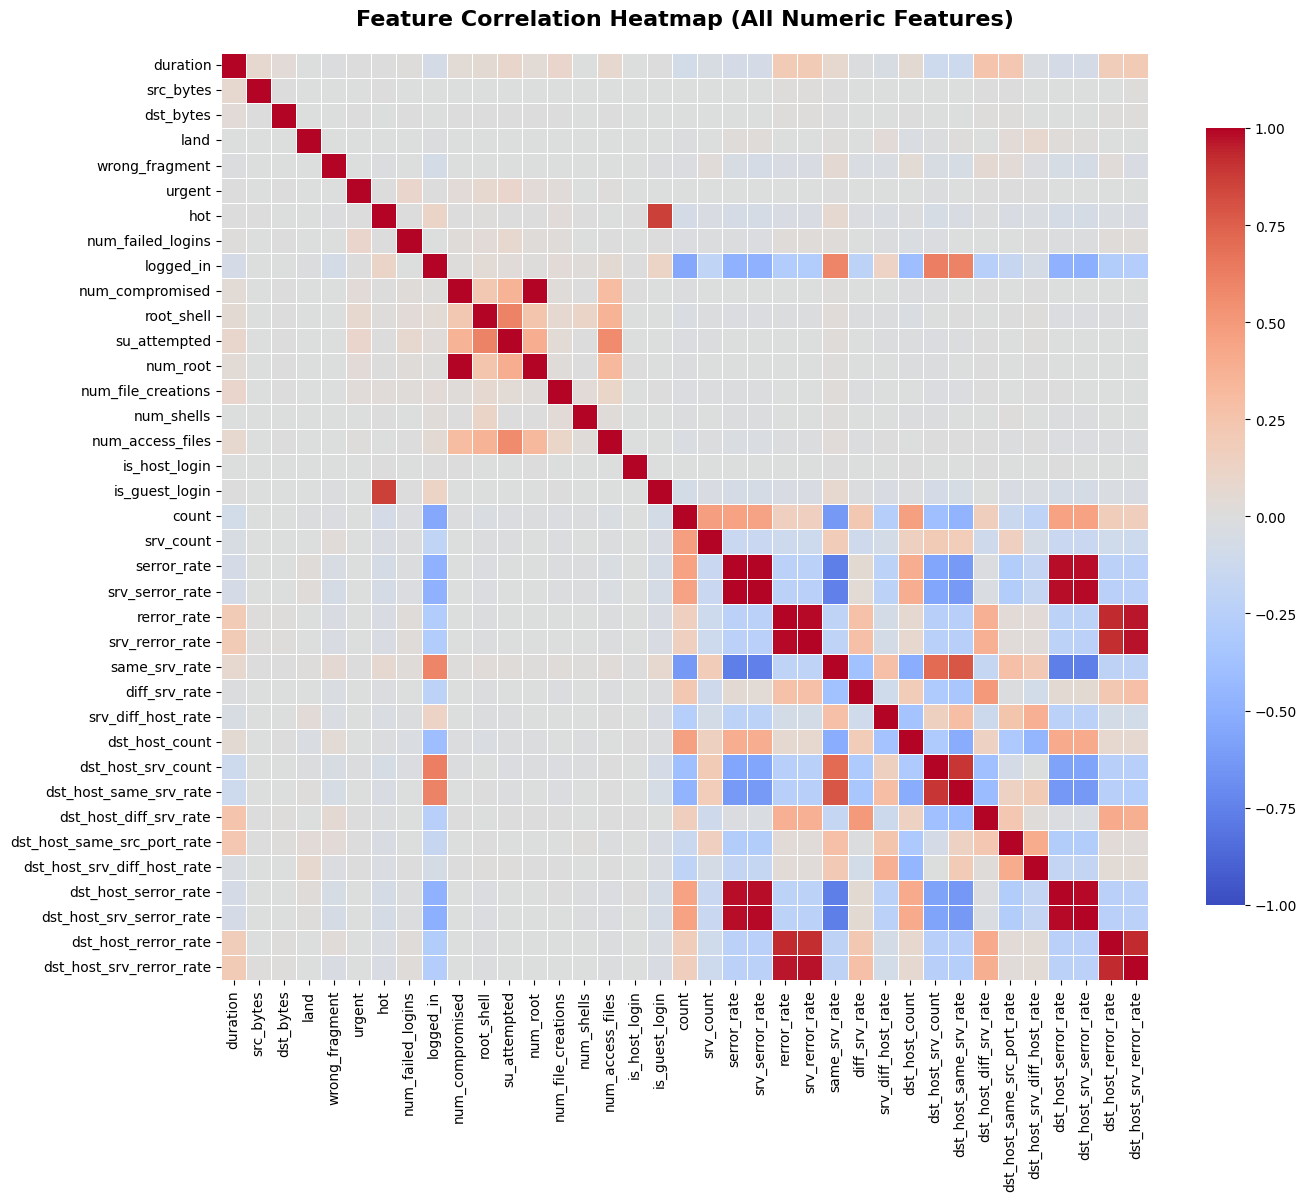


CORRELATION ANALYSIS

Highly correlated feature pairs (|r| > 0.8):
  num_compromised                     <-> num_root                           :  0.9988
  serror_rate                         <-> srv_serror_rate                    :  0.9933
  rerror_rate                         <-> srv_rerror_rate                    :  0.9890
  srv_serror_rate                     <-> dst_host_srv_serror_rate           :  0.9863
  dst_host_serror_rate                <-> dst_host_srv_serror_rate           :  0.9851
  serror_rate                         <-> dst_host_srv_serror_rate           :  0.9811
  serror_rate                         <-> dst_host_serror_rate               :  0.9794
  srv_serror_rate                     <-> dst_host_serror_rate               :  0.9776
  srv_rerror_rate                     <-> dst_host_srv_rerror_rate           :  0.9702
  rerror_rate                         <-> dst_host_srv_rerror_rate           :  0.9644
  rerror_rate                         <-> dst_host_rerror_rate

In [51]:
# Select numeric features (exclude labels and difficulty)
numeric_cols = df.drop(['difficulty_level', 'num_outbound_cmds'], 
                       axis=1).select_dtypes(include=[np.number]).columns.tolist()
features_for_analysis = [col for col in numeric_cols]

print(f"Analyzing correlations for {len(features_for_analysis)} numeric features")

# Calculate correlation matrix
corr_matrix = df[features_for_analysis].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap (All Numeric Features)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
high_corr_threshold = 0.8
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

# Print detailed analysis
print(f"\n{'='*80}")
print("CORRELATION ANALYSIS")
print(f"{'='*80}")
print(f"\nHighly correlated feature pairs (|r| > {high_corr_threshold}):")
if high_corr_pairs:
    for pair in sorted(high_corr_pairs, key=lambda x: abs(x['Correlation']), reverse=True):
        print(f"  {pair['Feature 1']:35s} <-> {pair['Feature 2']:35s}: {pair['Correlation']:7.4f}")
    print(f"\nTotal highly correlated pairs: {len(high_corr_pairs)}")
else:
    print("  None found - features are relatively independent!")
print(f"{'='*80}")

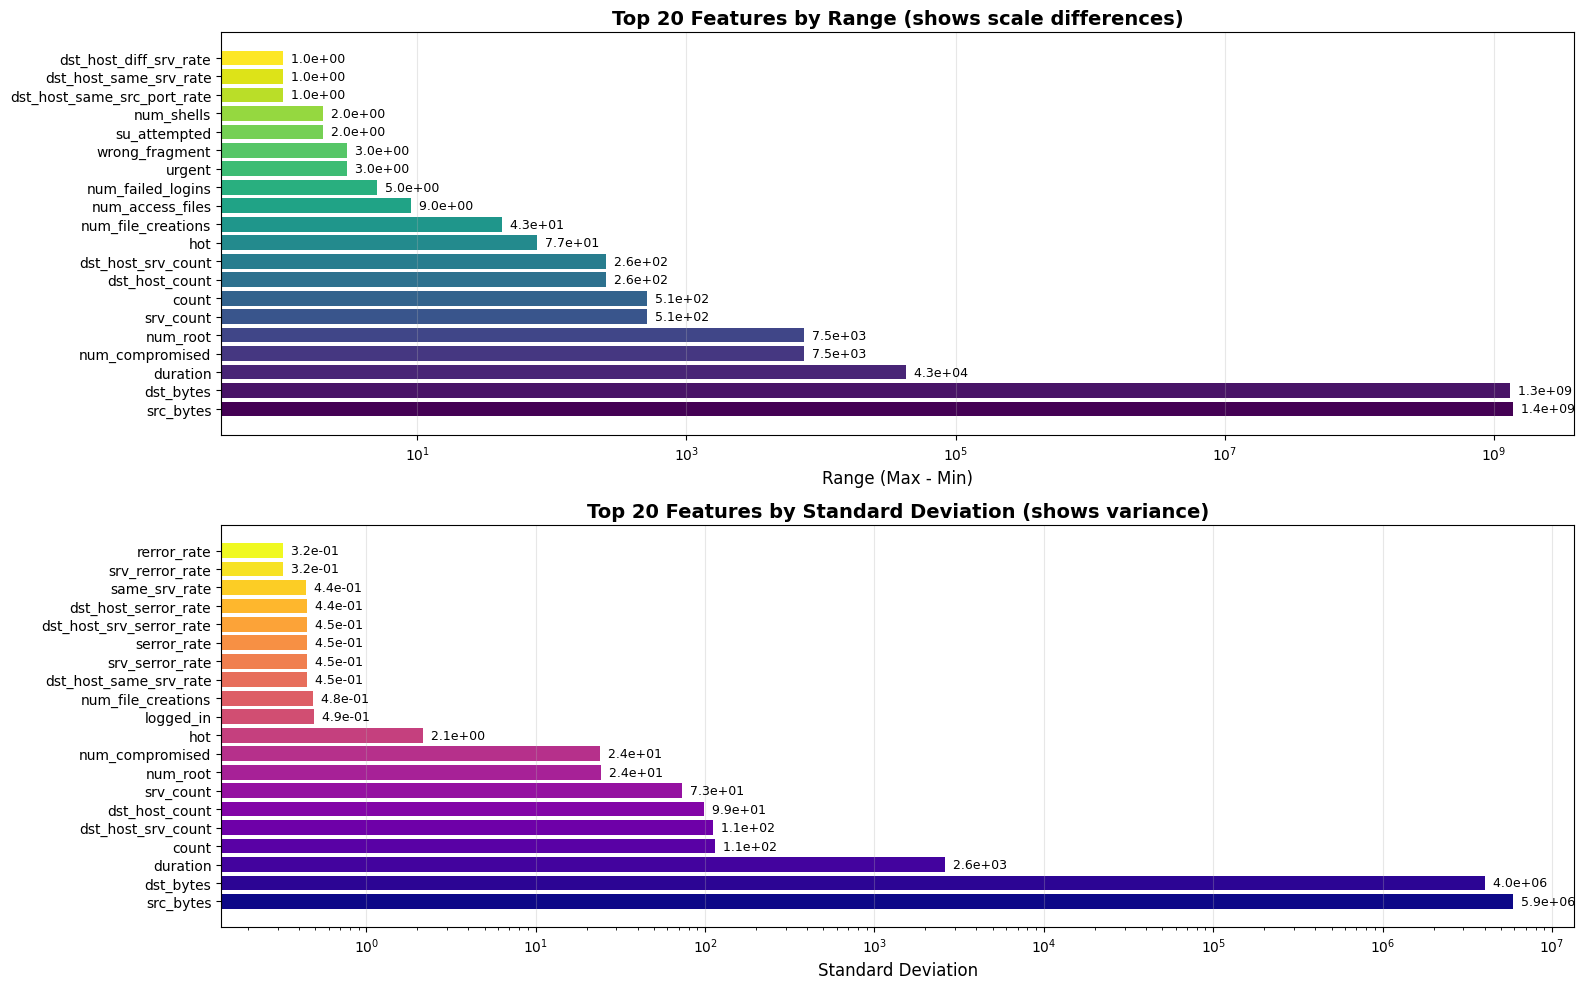


FEATURE SCALE ANALYSIS FOR PREPROCESSING

Features with largest ranges (will dominate distance calculations):
  src_bytes                     : [         0.0, 1379963888.0]  Range: 1.4e+09
  dst_bytes                     : [         0.0, 1309937401.0]  Range: 1.3e+09
  duration                      : [         0.0,      42908.0]  Range: 4.3e+04
  num_compromised               : [         0.0,       7479.0]  Range: 7.5e+03
  num_root                      : [         0.0,       7468.0]  Range: 7.5e+03
  srv_count                     : [         0.0,        511.0]  Range: 5.1e+02
  count                         : [         0.0,        511.0]  Range: 5.1e+02
  dst_host_count                : [         0.0,        255.0]  Range: 2.6e+02
  dst_host_srv_count            : [         0.0,        255.0]  Range: 2.6e+02
  hot                           : [         0.0,         77.0]  Range: 7.7e+01
  num_file_creations            : [         0.0,         43.0]  Range: 4.3e+01
  num_access_files  

In [52]:
# Feature Scale and Distribution Analysis
# This shows the range/scale differences between features - critical for choosing scaling method

# Get statistics for numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('difficulty_level')

# Calculate range, mean, std for each feature
feature_stats = pd.DataFrame({
    'Feature': numeric_features,
    'Min': df[numeric_features].min().values,
    'Max': df[numeric_features].max().values,
    'Range': df[numeric_features].max().values - df[numeric_features].min().values,
    'Mean': df[numeric_features].mean().values,
    'Std': df[numeric_features].std().values,
    'Variance': df[numeric_features].var().values
}).sort_values('Range', ascending=False)

# Plot feature ranges
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Top: Feature ranges (log scale)
ax1 = axes[0]
feature_ranges = feature_stats.head(20)
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_ranges)))
bars = ax1.barh(range(len(feature_ranges)), feature_ranges['Range'], color=colors)
ax1.set_yticks(range(len(feature_ranges)))
ax1.set_yticklabels(feature_ranges['Feature'])
ax1.set_xlabel('Range (Max - Min)', fontsize=12)
ax1.set_title('Top 20 Features by Range (shows scale differences)', fontsize=14, fontweight='bold')
ax1.set_xscale('log')
ax1.grid(axis='x', alpha=0.3)

# Add range values
for i, (idx, row) in enumerate(feature_ranges.iterrows()):
    ax1.text(row['Range'], i, f"  {row['Range']:.1e}", va='center', fontsize=9)

# Bottom: Feature standard deviations (log scale)
ax2 = axes[1]
feature_stds = feature_stats.sort_values('Std', ascending=False).head(20)
colors = plt.cm.plasma(np.linspace(0, 1, len(feature_stds)))
bars = ax2.barh(range(len(feature_stds)), feature_stds['Std'], color=colors)
ax2.set_yticks(range(len(feature_stds)))
ax2.set_yticklabels(feature_stds['Feature'])
ax2.set_xlabel('Standard Deviation', fontsize=12)
ax2.set_title('Top 20 Features by Standard Deviation (shows variance)', fontsize=14, fontweight='bold')
ax2.set_xscale('log')
ax2.grid(axis='x', alpha=0.3)

# Add std values
for i, (idx, row) in enumerate(feature_stds.iterrows()):
    ax2.text(row['Std'], i, f"  {row['Std']:.1e}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print analysis
print(f"\n{'='*80}")
print(f"FEATURE SCALE ANALYSIS FOR PREPROCESSING")
print(f"{'='*80}")
print(f"\nFeatures with largest ranges (will dominate distance calculations):")
for i, row in feature_stats.iterrows():
    print(f"  {row['Feature']:30s}: [{row['Min']:12.1f}, {row['Max']:12.1f}]  Range: {row['Range']:.1e}")


srv_count                 - Median:    8.0, Mean:   27.7, 95th%:  158.0, Max:    511, Skew:  4.69
count                     - Median:   14.0, Mean:   84.1, 95th%:  286.0, Max:    511, Skew:  1.51
dst_host_count            - Median:  255.0, Mean:  182.1, 95th%:  255.0, Max:    255, Skew: -0.83
dst_host_srv_count        - Median:   63.0, Mean:  115.7, 95th%:  255.0, Max:    255, Skew:  0.28


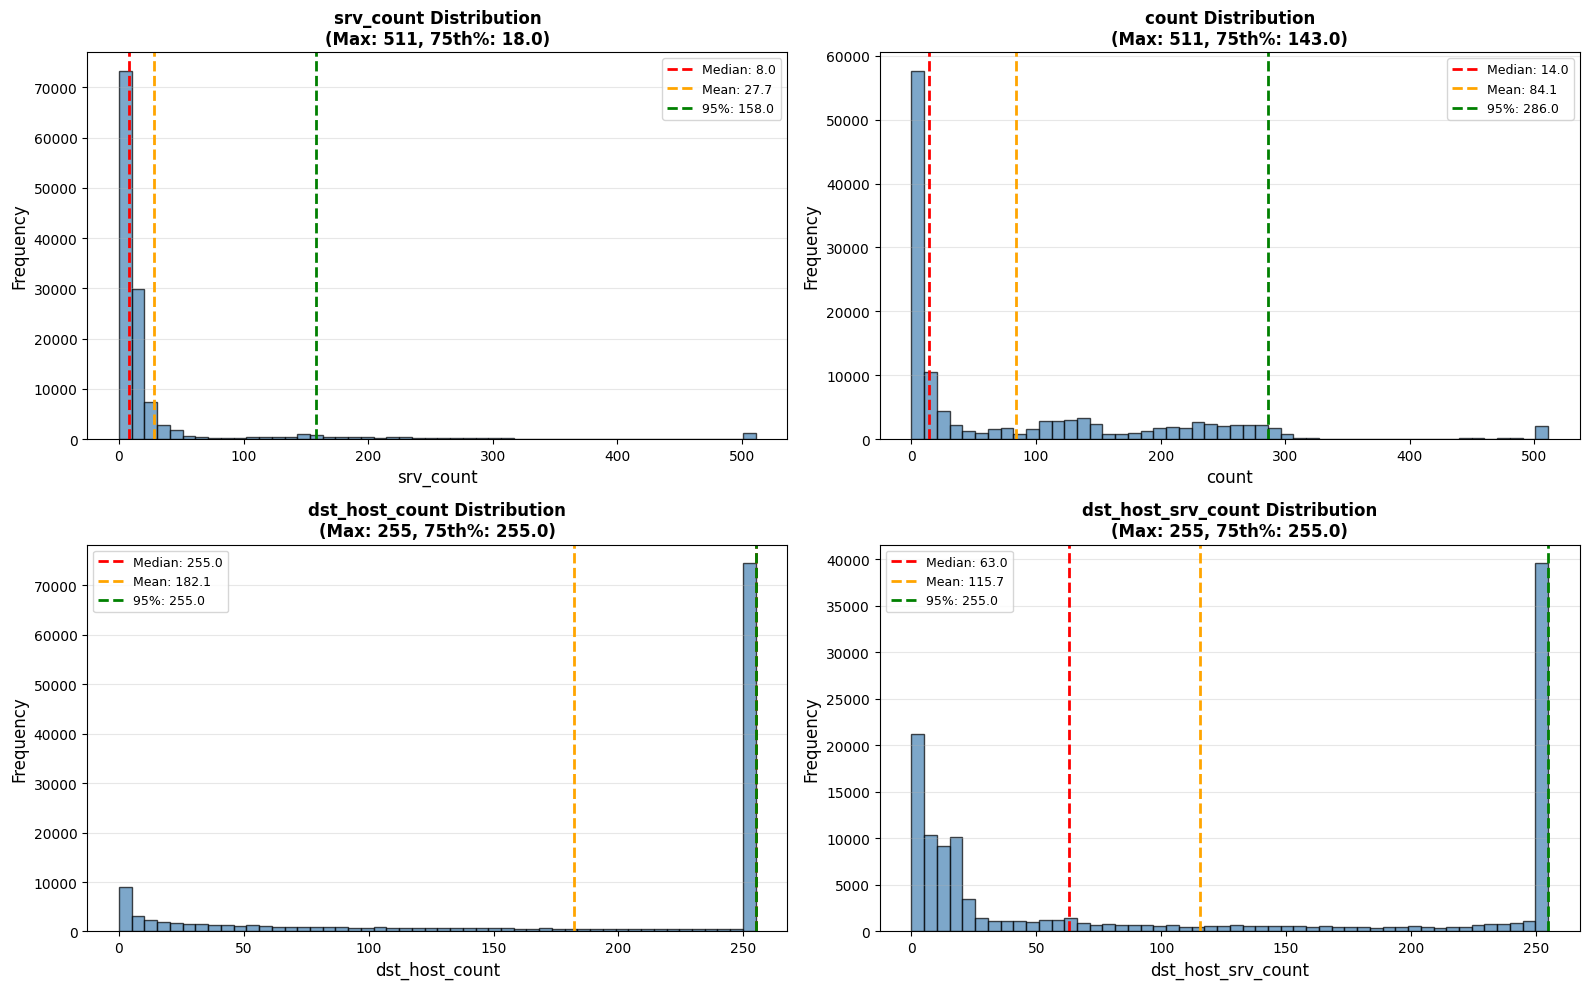

If most data is concentrated at low values with a long tail to the right,
the feature is RIGHT-SKEWED and benefits from log transformation.


In [53]:
# These features have moderate ranges (0-511, 0-255) - need to check if they're skewed

maybe_log_features = ['srv_count', 'count', 'dst_host_count', 'dst_host_srv_count']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(maybe_log_features):
    ax = axes[idx]
    
    # Create histogram
    ax.hist(df[feature], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    
    # Add statistics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    p75 = df[feature].quantile(0.75)
    p95 = df[feature].quantile(0.95)
    max_val = df[feature].max()
    
    # Add vertical lines for key statistics
    ax.axvline(median_val, color='red', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    ax.axvline(mean_val, color='orange', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(p95, color='green', linestyle='--', linewidth=2, label=f'95%: {p95:.1f}')
    
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'{feature} Distribution\n(Max: {max_val:.0f}, 75th%: {p75:.1f})', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Print skewness info
    skewness = df[feature].skew()
    print(f"{feature:25s} - Median: {median_val:6.1f}, Mean: {mean_val:6.1f}, "
          f"95th%: {p95:6.1f}, Max: {max_val:6.0f}, Skew: {skewness:5.2f}")

plt.tight_layout()
plt.show()

print("If most data is concentrated at low values with a long tail to the right,")
print("the feature is RIGHT-SKEWED and benefits from log transformation.")

In [54]:
feature_stats.sort_values('Std', ascending=False)

,Feature,Min,Max,Range,Mean,Std,Variance
1,src_bytes,0.0,1.379964e+09,1.379964e+09,45566.743000,5.870331e+06,3.446079e+13
2,dst_bytes,0.0,1.309937e+09,1.309937e+09,19779.114421,4.021269e+06,1.617061e+13
0,duration,0.0,4.290800e+04,4.290800e+04,287.144650,2.604515e+03,6.783500e+06
19,count,0.0,5.110000e+02,5.110000e+02,84.107555,1.145086e+02,1.311222e+04
29,dst_host_srv_count,0.0,2.550000e+02,2.550000e+02,115.653005,1.107027e+02,1.225510e+04
28,dst_host_count,0.0,2.550000e+02,2.550000e+02,182.148945,9.920621e+01,9.841873e+03
20,srv_count,0.0,5.110000e+02,5.110000e+02,27.737888,7.263584e+01,5.275965e+03
12,num_root,0.0,7.468000e+03,7.468000e+03,0.302192,2.439962e+01,5.953414e+02
9,num_compromised,0.0,7.479000e+03,7.479000e+03,0.279250,2.394204e+01,5.732214e+02
6,hot,0.0,7.700000e+01,7.700000e+01,0.204409,2.149968e+00,4.622364e+00
